In [11]:
# Next I want to see how much Amazon actually manipulates the review score vs a plain mathematical average
# The idea here is to see how much Amazon is doing to "improve" the usefulness of reviews to customers by increasing the dispersion, weighting things like 1-star reviews higher
# to reflect the higher importance customers put on them and so on.

# Unfortunately neither dataset I've used so far has the aggregated review score from Amazon so I have to use a third dataset here: https://www.kaggle.com/datasets/grikomsn/amazon-cell-phones-reviews

import csv
import pandas as pd


# file_path_reviews = "C:\Users\willf\OneDrive\Documents\NYDSA\Reviews Project\archive (3)\20191226-reviews.csv"

with open(r"C:\Users\willf\OneDrive\Documents\NYDSA\Reviews Project\archive (3)\20191226-items.csv", 'r', newline='') as meta_file:
    df_meta = pd.read_csv(meta_file)

# print(df_meta.head())

with open(r"C:\Users\willf\OneDrive\Documents\NYDSA\Reviews Project\archive (3)\20191226-reviews.csv", 'r', newline='') as review_file:
    df_reviews = pd.read_csv(review_file)

# df_reviews.head()

df_meta.shape[0]  

720

In [12]:
df_merged = df_reviews.merge(df_meta, on='asin', how='left')
df_merged.shape[0]

67986

In [13]:
df_avgs = df_merged.groupby('asin').agg({'rating_x': 'mean', 'rating_y': 'first'}).reset_index()
df_avgs.shape[0]

720

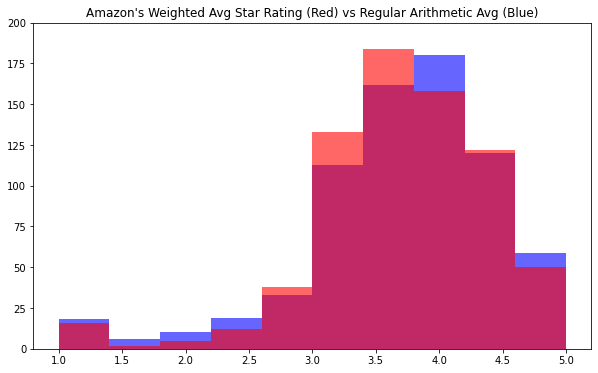

In [14]:
# Here we can see Amazon's weighted avg star-rating for products vs the regular arithmetic mean. They aren't far apart.
import matplotlib.pyplot as plt
y_max = 200
y_min = 0

fig, ax = plt.subplots(figsize=(10,6))

ax.hist(df_avgs['rating_x'],bins=10, alpha=0.6, color='blue')

ax.hist(df_avgs['rating_y'], bins=10, alpha=0.6, color ='red')
ax.set_title("Amazon's Weighted Avg Star Rating (Red) vs Regular Arithmetic Avg (Blue)")
ax.set_ylim(y_min, y_max)
plt.show()

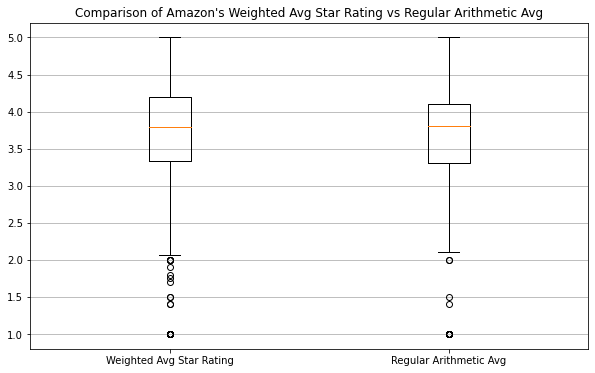

In [15]:
import matplotlib.pyplot as plt

# Assuming df_avgs is your DataFrame with 'rating_x' and 'rating_y' columns.
fig, ax = plt.subplots(figsize=(10, 6))

# Creating boxplot
ax.boxplot([df_avgs['rating_x'], df_avgs['rating_y']], labels=['Weighted Avg Star Rating', 'Regular Arithmetic Avg'])

# Setting the titles
ax.set_title("Comparison of Amazon's Weighted Avg Star Rating vs Regular Arithmetic Avg")

# Adding grid
ax.yaxis.grid(True)

plt.show()


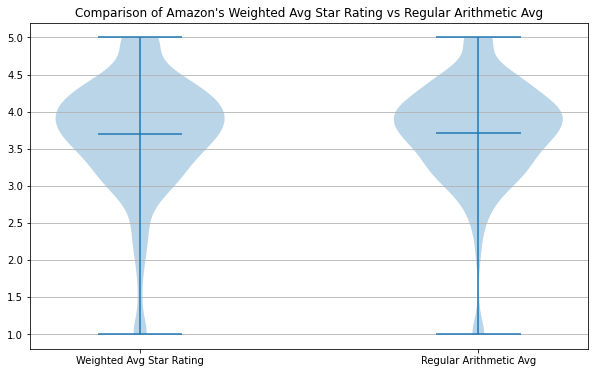

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.violinplot([df_avgs['rating_x'], df_avgs['rating_y']], showmeans=True)

# Setting labels for each plot
ax.set_xticks([1, 2])
ax.set_xticklabels(['Weighted Avg Star Rating', 'Regular Arithmetic Avg'])

# Setting the title
ax.set_title("Comparison of Amazon's Weighted Avg Star Rating vs Regular Arithmetic Avg")

# Adding grid
ax.yaxis.grid(True)

plt.show()

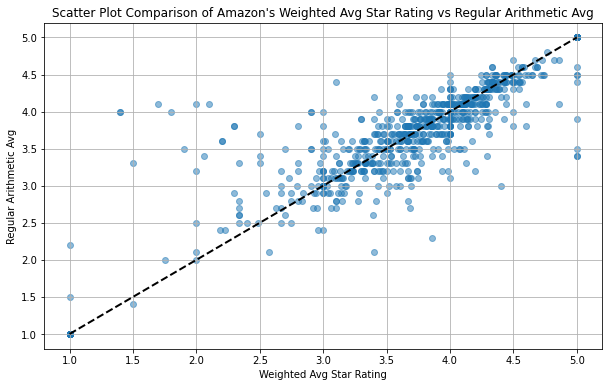

In [17]:
import matplotlib.pyplot as plt

# Assuming df_avgs is your DataFrame and it contains 'rating_x' for the weighted average
# and 'rating_y' for the arithmetic average.
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot where x and y are your two average ratings.
ax.scatter(df_avgs['rating_x'], df_avgs['rating_y'], alpha=0.5)

# Now, let's plot the y=x line which will serve as a reference.
max_rating = max(df_avgs['rating_x'].max(), df_avgs['rating_y'].max())
min_rating = min(df_avgs['rating_x'].min(), df_avgs['rating_y'].min())
ax.plot([min_rating, max_rating], [min_rating, max_rating], 'k--', lw=2)  # Black dashed line for y=x.

ax.set_xlabel('Weighted Avg Star Rating')
ax.set_ylabel('Regular Arithmetic Avg')
ax.set_title("Scatter Plot Comparison of Amazon's Weighted Avg Star Rating vs Regular Arithmetic Avg")
ax.grid(True)

plt.show()


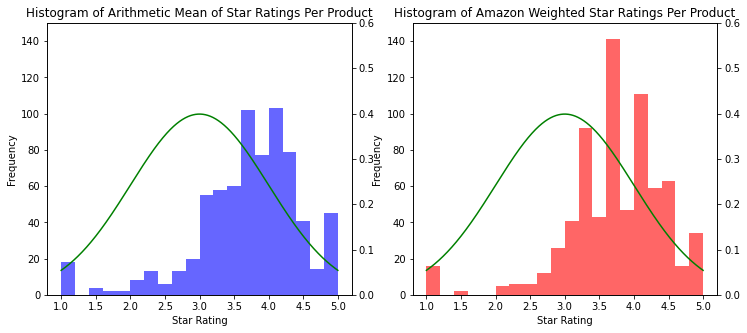

In [19]:
# Now just for clarity, I want to put the above side by side but each with an overlaid standard normal distribution from 1-5

import numpy as np
from scipy.stats import norm
import matplotlib.ticker as mtick

# first I'll set up the side by side

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

ax1_right = ax1.twinx()
ax2_right = ax2.twinx()


mean = 3
spread = 1

x = np.linspace(1,5,1000)
pdf = norm.pdf(x, mean, spread)

hist_x, bin_edges_x = np.histogram(df_avgs['rating_x'], bins=20, density=True)
bin_centers_x = (bin_edges_x[1:] + bin_edges_x[:-1]) / 2
# hist_std_normal_x = np.interp(bin_centers_x, x, pdf)

ax1.hist(df_avgs['rating_x'], bins = 20, color = 'blue', alpha=0.6)
ax1.set_title('Histogram of Arithmetic Mean of Star Ratings Per Product')
ax1.set_xlabel('Star Rating')
ax1.set_ylabel ('Frequency')
ax1.set_ylim(0,150)


ax1_right.plot(x, pdf, color='green', label='Standard Normal Distribution' )
ax1_right.set_ylim(0,0.6)


hist_y, bin_edges_y = np.histogram(df_avgs['rating_y'], bins=20, density=True)
bin_centers_y = (bin_edges_y[1:] + bin_edges_y[:-1]) / 2

ax2.hist(df_avgs['rating_y'], bins = 20, color = 'red', alpha=0.6)
ax2.set_title('Histogram of Amazon Weighted Star Ratings Per Product')
ax2.set_xlabel('Star Rating')
ax2.set_ylabel ('Frequency')
ax2.set_ylim(0,150)

ax2_right.plot(x, pdf, color='green', label='Standard Normal Distribution' )
ax2_right.set_ylim(0,0.6)

plt.style.use("ggplot")
plt.show()